Model loaded!
Sampling image...
Done!


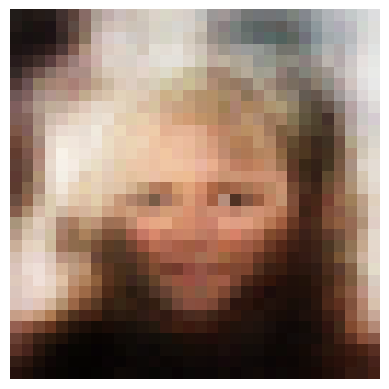

Sampling image...
Done!


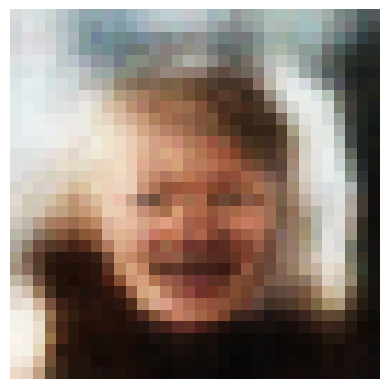

Sampling image...
Done!


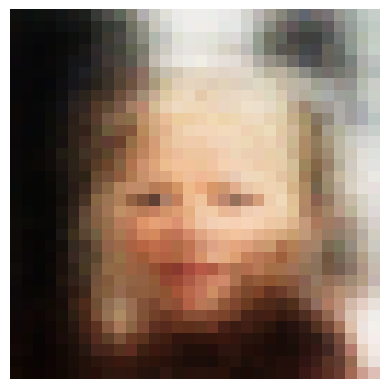

In [16]:
from model import Model
from data import MNIST, Faces
import torch
import matplotlib.pyplot as plt

dimensions = [3,32,32]
model = Model([3,32,32], channels=3, filters=[32,64,128,256,512])
dataset = Faces()

model.load_model("diffusion_model")
model.sample_and_show_image()
model.sample_and_show_image()
model.sample_and_show_image()


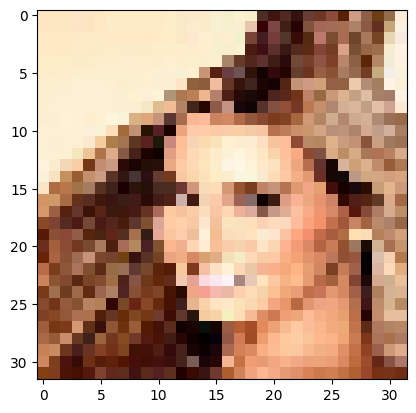

In [14]:
x0 = dataset[0]
plt.imshow((x0 * 0.5 + 0.5).view(3,32,32).permute(1,2,0))


In [3]:
ts = model.sample_time_steps(5)
noisy_xs, eps = model.make_noisy_image(xs, ts)

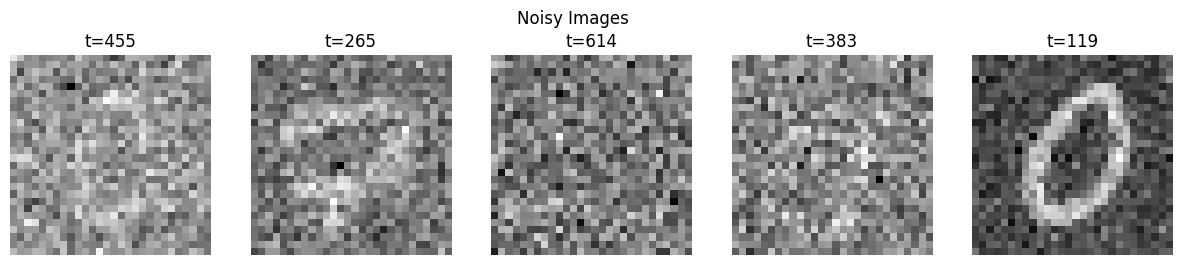

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("Noisy Images")
for i, ax in enumerate(axs):
    ax.imshow(noisy_xs[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"t={ts[i]}")
    ax.axis('off')

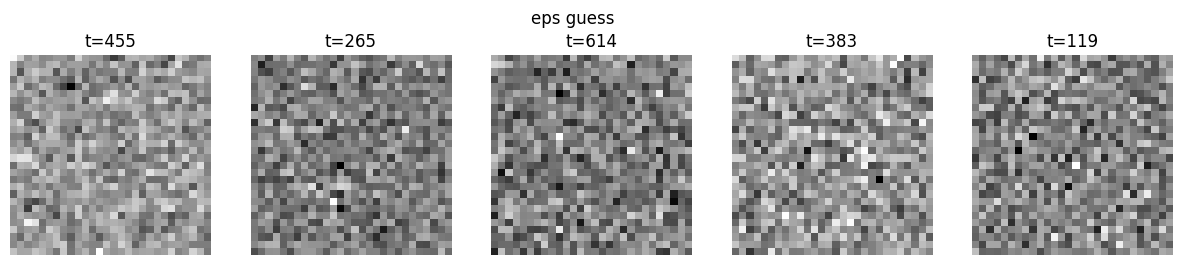

In [5]:
t_enc = model.time_encoding(ts)
eps_guess = model(noisy_xs, t_enc).detach()
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("eps guess")
for i, ax in enumerate(axs):
    ax.imshow(eps_guess[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"t={ts[i]}")
    ax.axis('off')


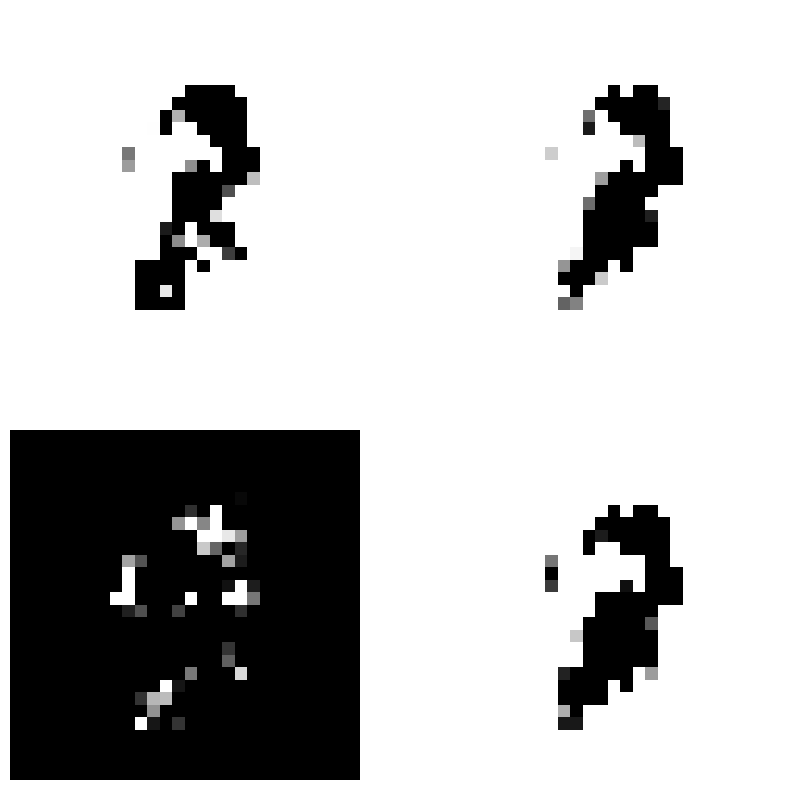

In [6]:
samples = [model.sample_image() for _ in range(4)]
fig, axs = plt.subplots(2,2, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(samples[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

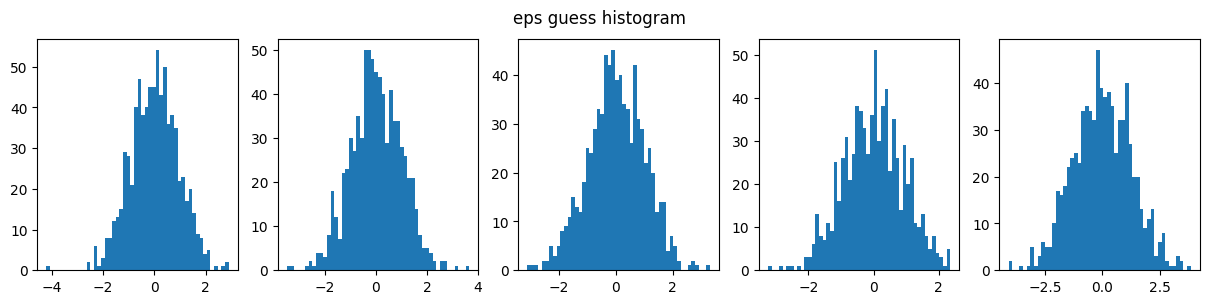

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("eps guess histogram")
for i, ax in enumerate(axs):
    ax.hist(eps_guess[i].flatten(), bins=50)


In [11]:
diff = (eps - eps_guess)**2
print(diff.mean())

tensor(0.1269)


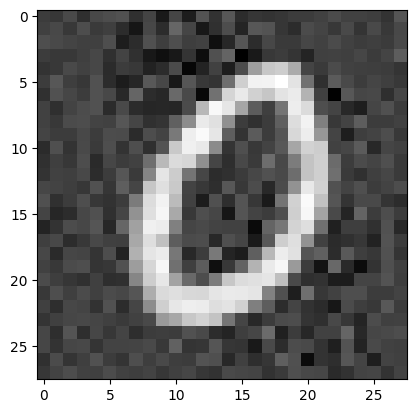

In [17]:
n=4
x0 = (noisy_xs[n] - model.sqrt_one_minus_alpha_hat[ts[n]] * eps_guess[n]) / model.sqrt_alpha_hat[ts[n]]
plt.imshow(x0.reshape(28, 28), cmap='gray')